In [1]:
from ctlearn.image_mapping import ImageMapper

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the image mappers
camera_types = ['LSTCam', 'FlashCam', 'NectarCam', 'SCTCam', 'DigiCam', 'CHEC',
                'ASTRICam', 'VERITAS', 'MAGICCam', 'FACT', 'HESS-I', 'HESS-II']
hex_algos = ['oversampling', 'rebinning', 'nearest_interpolation',
             'bilinear_interpolation', 'bicubic_interpolation']

mappers = {}
for hex_algo in hex_algos:
    print(hex_algo)
    %time mappers[hex_algo] = ImageMapper(hex_conversion_algorithm={cam: hex_algo for cam in camera_types}, mask_interpolation=True)

oversampling
CPU times: user 4.21 s, sys: 961 ms, total: 5.17 s
Wall time: 5.19 s
rebinning
CPU times: user 15 s, sys: 1.51 s, total: 16.6 s
Wall time: 16.5 s
nearest_interpolation
CPU times: user 3.57 s, sys: 1.03 s, total: 4.6 s
Wall time: 4.6 s
bilinear_interpolation
CPU times: user 8.2 s, sys: 1.58 s, total: 9.77 s
Wall time: 9.7 s
bicubic_interpolation
CPU times: user 31.6 s, sys: 1.7 s, total: 33.3 s
Wall time: 33.1 s


In [3]:
# Generate test pixel values (value is the pixel number)
test_pixel_values = {}
for tel in camera_types:
    test_pixel_values[tel] = np.concatenate(([0.0], np.arange(0, mappers['oversampling'].num_pixels[tel], 1)))
    test_pixel_values[tel] = np.expand_dims(test_pixel_values[tel], axis=1)

In [4]:
# Test loading time for individual telescopes
for cam in camera_types:
    print(cam)
    %time ImageMapper(camera_types=[cam])

LSTCam
CPU times: user 435 ms, sys: 188 ms, total: 623 ms
Wall time: 621 ms
FlashCam
CPU times: user 237 ms, sys: 80.2 ms, total: 317 ms
Wall time: 316 ms
NectarCam
CPU times: user 469 ms, sys: 156 ms, total: 625 ms
Wall time: 625 ms
SCTCam
CPU times: user 1.51 s, sys: 501 ms, total: 2.01 s
Wall time: 2 s
DigiCam
CPU times: user 143 ms, sys: 15.9 ms, total: 159 ms
Wall time: 159 ms
CHEC
CPU times: user 85.2 ms, sys: 0 ns, total: 85.2 ms
Wall time: 84.9 ms
ASTRICam
CPU times: user 82.4 ms, sys: 24 ms, total: 106 ms
Wall time: 106 ms
VERITAS
CPU times: user 30.8 ms, sys: 0 ns, total: 30.8 ms
Wall time: 30.7 ms
MAGICCam
CPU times: user 201 ms, sys: 16 ms, total: 217 ms
Wall time: 217 ms
FACT
CPU times: user 122 ms, sys: 31.8 ms, total: 153 ms
Wall time: 153 ms
HESS-I
CPU times: user 74.9 ms, sys: 0 ns, total: 74.9 ms
Wall time: 74.1 ms
HESS-II
CPU times: user 239 ms, sys: 67.5 ms, total: 307 ms
Wall time: 306 ms


In [5]:
def plot_image(mapper, camera_type):
    print(camera_type)
    image = mapper.map_image(test_pixel_values[camera_type], camera_type)
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(image[:,:,0], cmap='viridis')
    plt.show()

Default
LSTCam


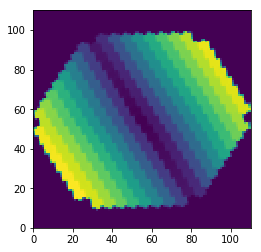

Padding
LSTCam


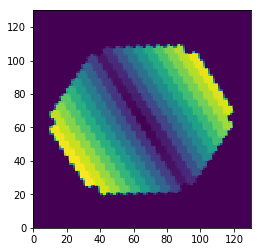

Default
FlashCam


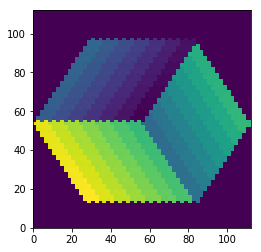

Padding
FlashCam


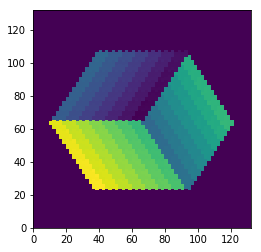

Default
NectarCam


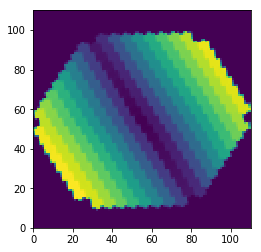

Padding
NectarCam


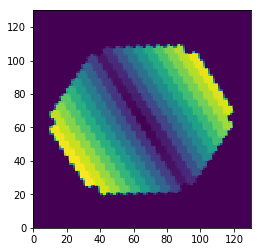

Default
SCTCam


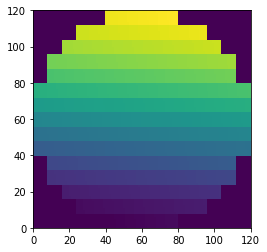

Padding
SCTCam


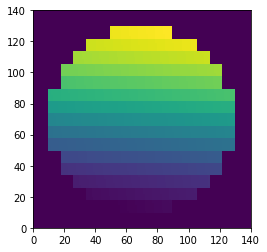

Default
DigiCam


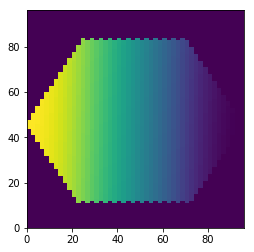

Padding
DigiCam


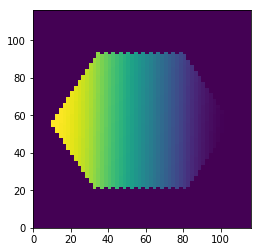

Default
CHEC


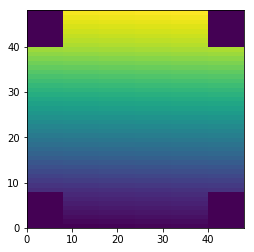

Padding
CHEC


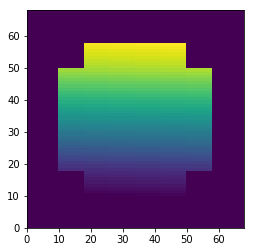

Default
ASTRICam


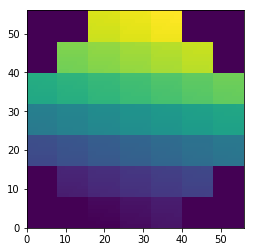

Padding
ASTRICam


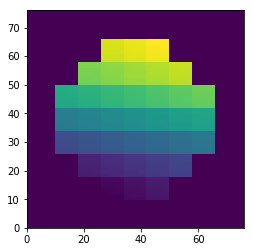

Default
VERITAS


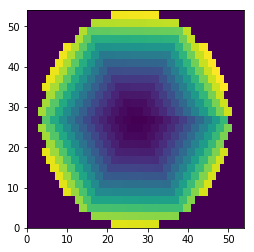

Padding
VERITAS


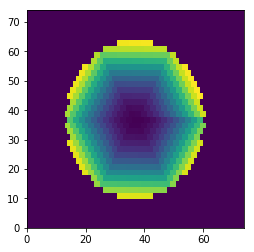

Default
MAGICCam


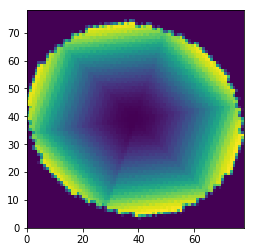

Padding
MAGICCam


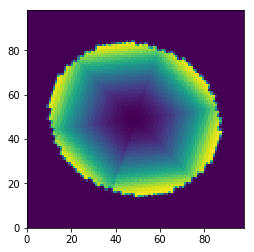

Default
FACT


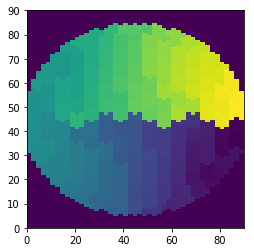

Padding
FACT


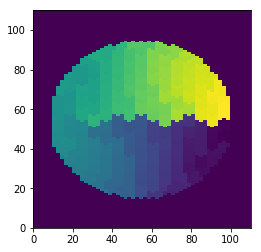

Default
HESS-I


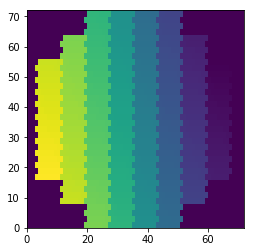

Padding
HESS-I


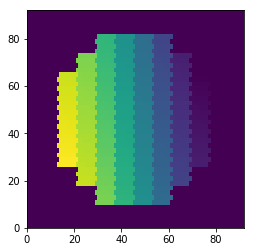

Default
HESS-II


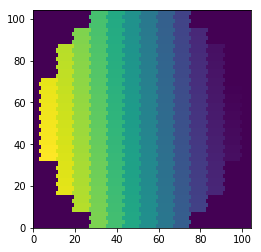

Padding
HESS-II


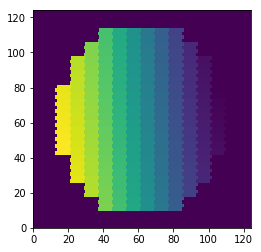

In [6]:
# Plot mapped images with and without padding
default_mapper = ImageMapper()
padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types})
for cam in camera_types:
    print('Default')
    plot_image(default_mapper, cam)
    print('Padding')
    plot_image(padding_mapper, cam)

oversampling
HESS-II


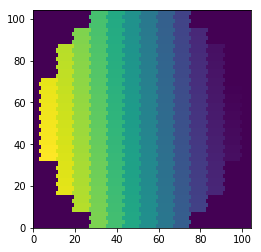

CPU times: user 544 ms, sys: 9.3 ms, total: 553 ms
Wall time: 534 ms

rebinning
HESS-II


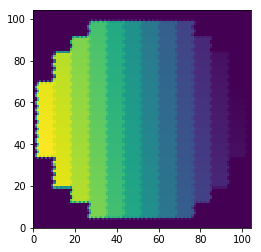

CPU times: user 472 ms, sys: 15.9 ms, total: 488 ms
Wall time: 467 ms

nearest_interpolation
HESS-II


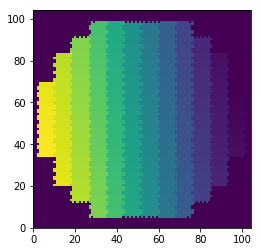

CPU times: user 475 ms, sys: 12.2 ms, total: 487 ms
Wall time: 467 ms

bilinear_interpolation
HESS-II


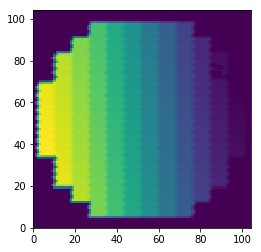

CPU times: user 544 ms, sys: 4.73 ms, total: 549 ms
Wall time: 540 ms

bicubic_interpolation
HESS-II


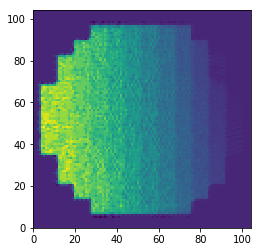

CPU times: user 477 ms, sys: 11.5 ms, total: 489 ms
Wall time: 472 ms



In [7]:
# Plot mapped images for each hexagonal conversion algorithm
for hex_algo in hex_algos:
    print(hex_algo)
    %time plot_image(mappers[hex_algo], 'HESS-II')
    print('')

LSTCam


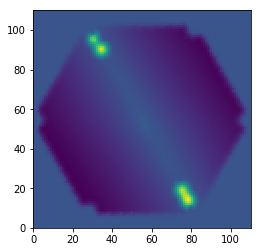

FlashCam


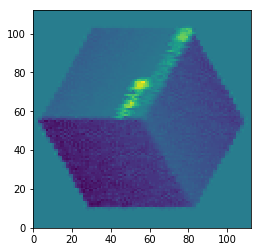

NectarCam


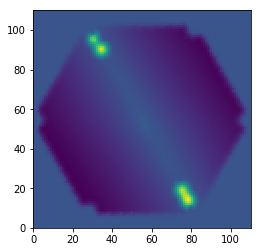

SCTCam


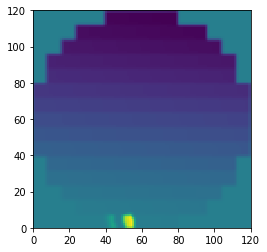

DigiCam


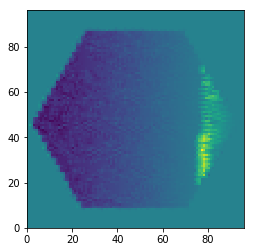

CHEC


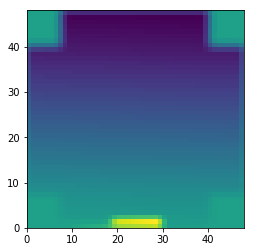

ASTRICam


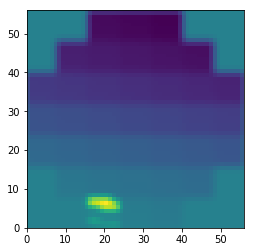

VERITAS


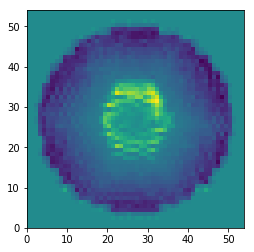

MAGICCam


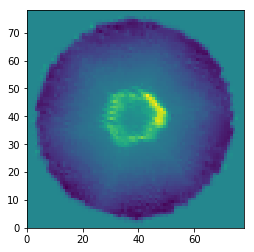

FACT


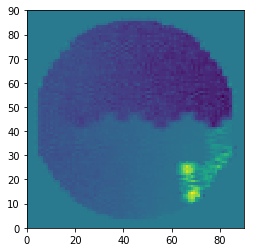

HESS-I


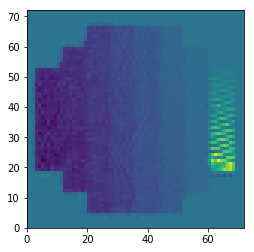

HESS-II


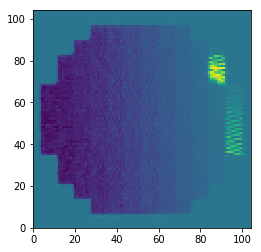

In [9]:
# Compare masked and non-masked interpolation
camera_types = ['LSTCam', 'FlashCam', 'NectarCam', 'SCTCam', 'DigiCam', 'CHEC',
                'ASTRICam', 'VERITAS', 'MAGICCam', 'FACT', 'HESS-I', 'HESS-II']
masked_mapper = ImageMapper(hex_conversion_algorithm={cam: 'bicubic_interpolation' for cam in camera_types}, mask_interpolation=True)
unmasked_mapper = ImageMapper(hex_conversion_algorithm={cam: 'bicubic_interpolation' for cam in camera_types}, mask_interpolation=False)
for cam in camera_types:
    print(cam)
    image = unmasked_mapper.map_image(test_pixel_values[cam], cam) - masked_mapper.map_image(test_pixel_values[cam], cam)
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(image[:,:,0], cmap='viridis')
    plt.show()